In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, average_precision_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_df = pd.read_csv('UCI_Credit_Card.csv')
raw_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# No missing data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# Weird column names.. renaming
raw_df.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'def_pay'}, inplace=True)

In [5]:
raw_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# More women than men, not too skewed
raw_df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

##### Consolidating unknowns into other for Education...

In [7]:
# Category 4 is the "Other" category. Categories 5 & 6 are "unknown" - reclassify as other
raw_df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [8]:
edu_fill = (raw_df['EDUCATION'] == 5) | (raw_df['EDUCATION'] == 6) | (raw_df['EDUCATION'] == 0)
raw_df.loc[edu_fill, 'EDUCATION'] = 4
raw_df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

##### Consolidating unknowns into other for Marriage...

In [9]:
# 3 is other. 0 must be unknown. Lump 0 in with 3
# 1 is married, 2 is single... other must be divorced or widowed... or those polyamorous relationships
raw_df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [10]:
mar_fill = (raw_df['MARRIAGE'] == 0)
raw_df.loc[mar_fill, 'MARRIAGE'] = 3
raw_df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [11]:
# Let's see how payments look...
raw_df.PAY_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

-1 means the individual paid on time. Why -1, I'm not sure. But if -1 is paid on time, and 1 is paid one month late, I assume -2 and 0 means the person paid on time as well.

So... judgement call. Let's lump -2, -1, 0 together as 0, which represents paid on time.

In [12]:
pay_cols = list(raw_df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].columns)

In [13]:
pay_cols[0]

'PAY_1'

In [14]:
# Quick for loop to lump -2, -1, and 0 together for all payment columns
for col in pay_cols:
    pay_fill = (raw_df[col] == -2) | (raw_df[col] == -1) | (raw_df[col] == 0)
    raw_df.loc[pay_fill, col] = 0

In [15]:
# Did it work?
raw_df.PAY_1.value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

In [18]:
df = raw_df
df.to_csv('cc_data_cleaned', index=False)

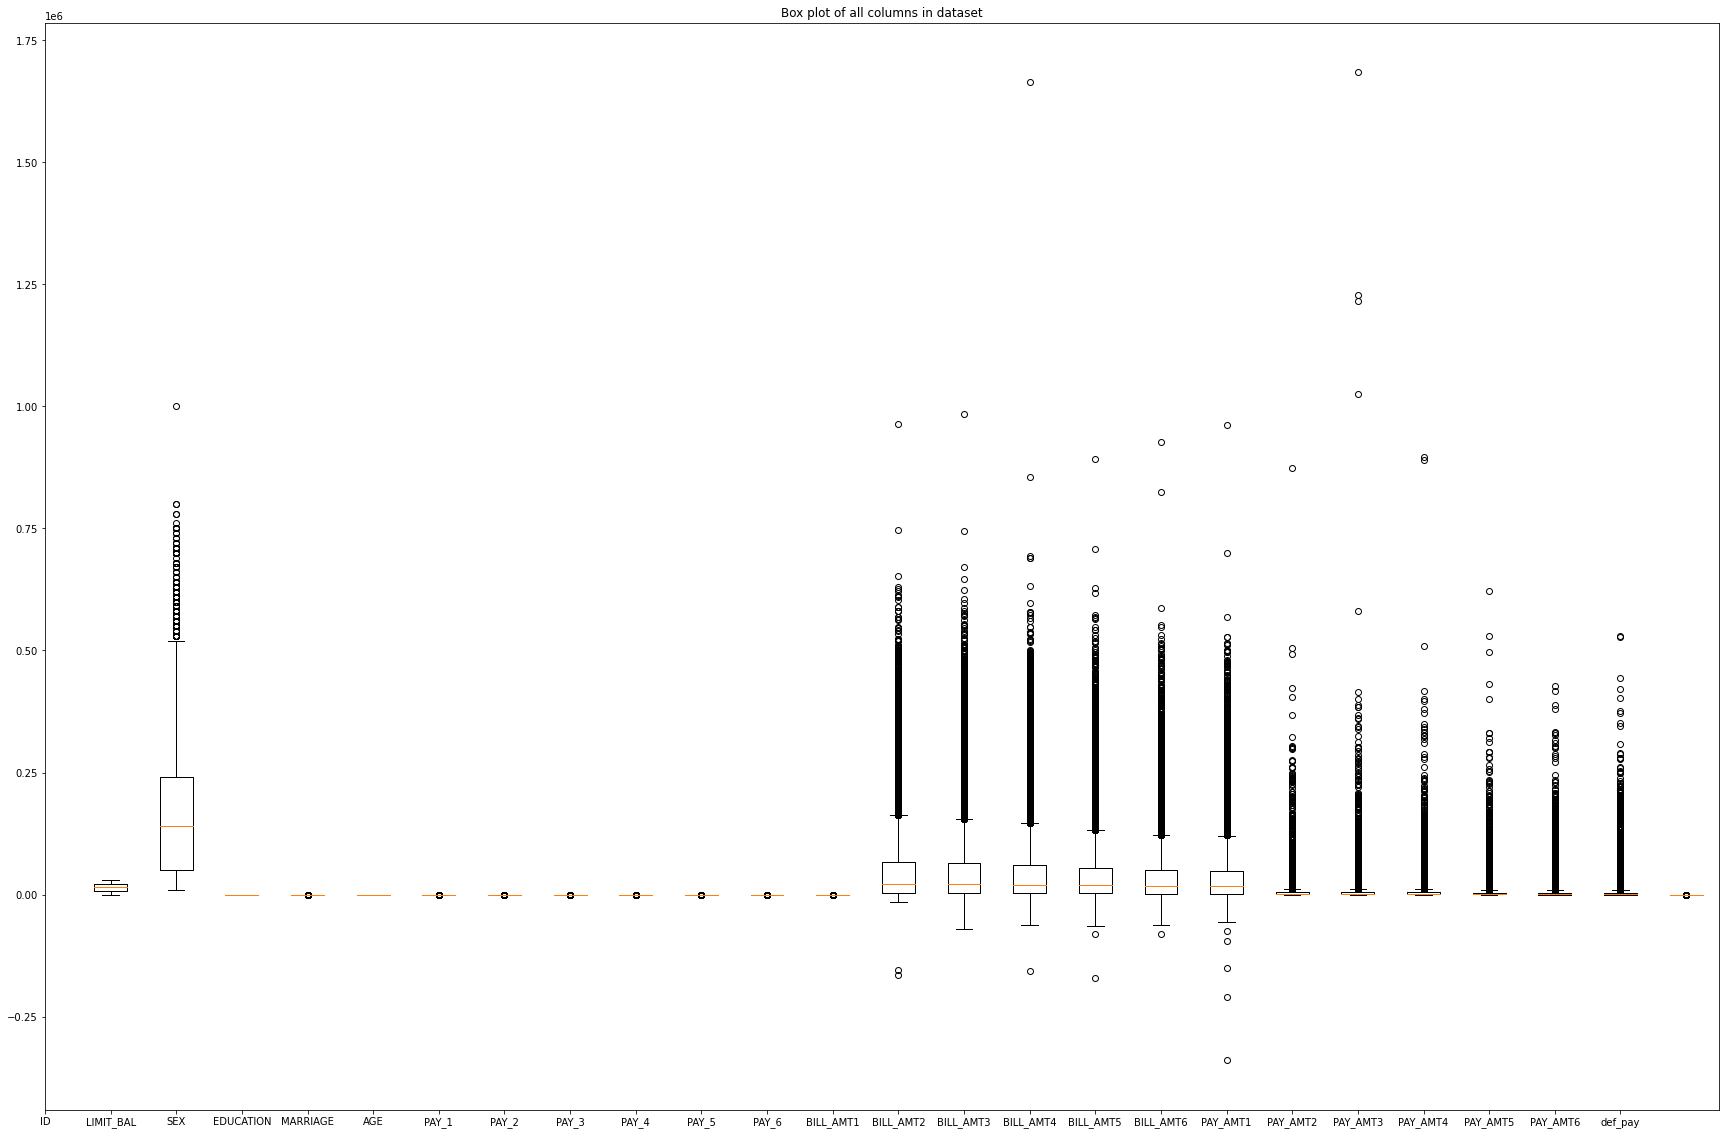

In [17]:
# Create a box plot of each column
plt.figure(figsize=(30, 20))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values)
plt.show()

Them skews though....

# Algorithm Models: Classification

## Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
df = pd.read_csv('cc_data_cleaned')

In [7]:
# Split into predictors
X = df.drop('def_pay', axis=1)
y = df['def_pay']

# TTS then scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

scaler = StandardScaler()

# Scaling both X datasets. Make sure to just fit_transform training data
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

# Instantiating logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e5, solver='liblinear')

# Fit the model to normalized training data
logreg.fit(X_train_norm, y_train)

# Prediction
y_hat_train = logreg.predict(X_train_norm)
y_hat_test = logreg.predict(X_test_norm)

# Print results
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.47829702311658073
Testing Precision:  0.48468379446640314


Training Recall:  0.5813624418839701
Testing Recall:  0.5808170515097691


Training Accuracy:  0.7685333333333333
Testing Accuracy:  0.7665333333333333


Training F1-Score:  0.5248175182481752
Testing F1-Score:  0.5284136816590358


Yikes... I guess we'll see how other models do!

In [22]:
cm = confusion_matrix(y_test, y_hat_test)
print(cm)

[[4768 1043]
 [ 708  981]]


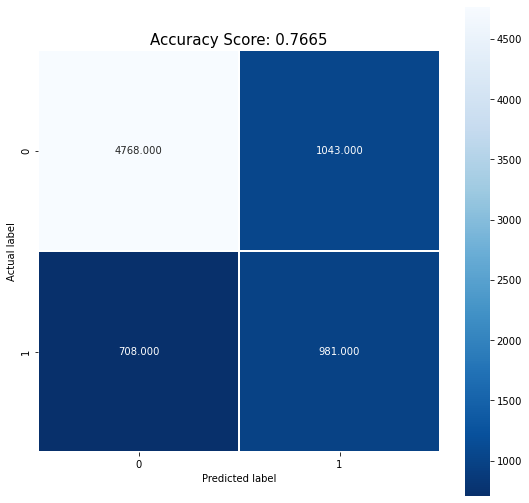

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, y_hat_test), 4))
plt.title(all_sample_title, size = 15);

In [24]:
# One problem for logreg is that the rates of default is quite lower than non-default
# Hence the large false positives

AUC: 0.7006649360112948


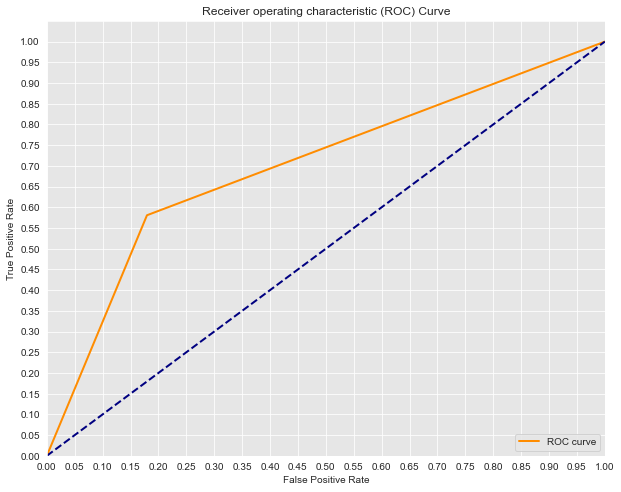

In [25]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

Making some quick functions. One for scoring. Another for finding optimal K-value.

In [3]:
def print_metrics(train_preds, train_labels, test_labels, test_preds):
    print("Training Model:")
    print("Precision Score (Train): {:.4}%".format((precision_score(train_labels, train_preds))*100))
    print("Recall Score (Train): {:.4}%".format((recall_score(train_labels, train_preds))*100))
    print("Accuracy Score (Train): {:.4}%".format((accuracy_score(train_labels, train_preds))*100))
    print("F1 Score (Train): {:.4}%".format((f1_score(train_labels, train_preds))*100))
    print("mAP (Train) Score: {:.4}%".format((average_precision_score(train_labels, train_preds))*100))
    
    print("\nTest Model:")
    print("Precision Score (Test): {:.4}%".format((precision_score(test_labels, test_preds))*100))
    print("Recall Score (Test): {:.4}%".format((recall_score(test_labels, test_preds))*100))
    print("Accuracy Score (Test): {:.4}%".format((accuracy_score(test_labels, test_preds))*100))
    print("F1 Score (Test): {:.4}%".format((f1_score(test_labels, test_preds))*100))
    print("mAP (Test) Score: {:.4}%".format((average_precision_score(test_labels, test_preds))*100))

In [28]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [29]:
# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the classifier
knn.fit(X_train_norm, y_train)

# Predict on the test set
test_preds = knn.predict(X_test_norm)

In [30]:
print_metrics(y_test, test_preds)

Precision Score (Test): 0.5546058879392213
Recall Score (Test): 0.3457667258732978
Accuracy Score (Test): 0.7901333333333334
F1 Score (Test): 0.4259664478482859


In [31]:
find_best_k(X_train_norm, y_train, X_test_norm, y_test)

Best Value for k: 17
F1-Score: 0.4453125


In [32]:
# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)

# Fit the classifier
knn.fit(X_train_norm, y_train)

# Predict on the test set
test_preds = knn.predict(X_test_norm)

In [51]:
print_metrics(y_test, test_preds)

Precision Score (Test): 65.44%
Recall Score (Test): 33.75%
Accuracy Score (Test): 81.07%
F1 Score (Test): 44.53%
mAP (Test) Score: 37.01%


KNN's base model performed worse than the logreg model for classification of the credit card set.

#### F-1 Test Scores (Prediction)

Logistic Regression: 0.5284

KNN (n=17): 0.4453

## Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

Definitely going to use sklearn over hard-coding because I'm lazy...

In [53]:
# Instantiate Naive Bayes
bayes = GaussianNB()

# Fit classifier
bayes.fit(X_train_norm, y_train)

# Predictions on test set
test_preds = bayes.predict(X_test_norm)

In [54]:
print_metrics(y_test, test_preds)

Precision Score (Test): 48.06%
Recall Score (Test): 55.06%
Accuracy Score (Test): 76.48%
F1 Score (Test): 51.32%
mAP (Test) Score: 36.58%


Better than KNN out of the box and fairly similar to Logistic Regression

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [56]:
# Set the parameters by cross-validation
tuned_parameters = [{'priors': [-1, None], 'var_smoothing': [0.00000001 ,0.01, 0.1, 0.5, 1.0, 10.0]}]

scores = ['precision', 'recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        GaussianNB(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train_norm, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test_norm)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'priors': None, 'var_smoothing': 10.0}

Grid scores on development set:

nan (+/-nan) for {'priors': -1, 'var_smoothing': 1e-08}
nan (+/-nan) for {'priors': -1, 'var_smoothing': 0.01}
nan (+/-nan) for {'priors': -1, 'var_smoothing': 0.1}
nan (+/-nan) for {'priors': -1, 'var_smoothing': 0.5}
nan (+/-nan) for {'priors': -1, 'var_smoothing': 1.0}
nan (+/-nan) for {'priors': -1, 'var_smoothing': 10.0}
0.674 (+/-0.011) for {'priors': None, 'var_smoothing': 1e-08}
0.674 (+/-0.011) for {'priors': None, 'var_smoothing': 0.01}
0.677 (+/-0.011) for {'priors': None, 'var_smoothing': 0.1}
0.702 (+/-0.017) for {'priors': None, 'var_smoothing': 0.5}
0.711 (+/-0.018) for {'priors': None, 'var_smoothing': 1.0}
0.717 (+/-0.056) for {'priors': None, 'var_smoothing': 10.0}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

         

In [57]:
# Instantiate Naive Bayes
bayes = GaussianNB(var_smoothing=0.1)

# Fit classifier
bayes.fit(X_train_norm, y_train)

# Predictions on test set
test_preds = bayes.predict(X_test_norm)

In [58]:
print_metrics(y_test, test_preds)

Precision Score (Test): 48.7%
Recall Score (Test): 54.17%
Accuracy Score (Test): 76.83%
F1 Score (Test): 51.29%
mAP (Test) Score: 36.7%


## Decision Tree

In [61]:
# import the dtree classifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
# Instantiate Tree Classifier
tree = DecisionTreeClassifier()

# Fit classifier - straight out of the box
tree.fit(X_train_norm, y_train)

# Predictions on Test Set
test_preds = tree.predict(X_test_norm)

print_metrics(y_test, test_preds)

Precision Score (Test): 39.56%
Recall Score (Test): 42.27%
Accuracy Score (Test): 72.45%
F1 Score (Test): 40.87%
mAP (Test) Score: 29.72%


In [ ]:
# Interesting... precision and recall evened out but everything got worse. Will try some tuning and pruning

## Ensemble Methods

### Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Performs slightly better when scaled
# Instantiate, leave as base model for now
rf_clf = RandomForestClassifier()

# Fit classifier
rf_clf.fit(X_train, y_train)

# Predictions on test set
test_preds = rf_clf.predict(X_test)

print_metrics(y_test, test_preds)

Precision Score (Test): 65.8%
Recall Score (Test): 35.76%
Accuracy Score (Test): 81.35%
F1 Score (Test): 46.34%
mAP (Test) Score: 38.0%


In [20]:
# Instantiate, leave as base model for now
rf_clf = RandomForestClassifier()

# Fit classifier
rf_clf.fit(X_train_norm, y_train)

# Predictions on test set
test_preds = rf_clf.predict(X_test_norm)

print_metrics(y_test, test_preds)

Precision Score (Test): 66.93%
Recall Score (Test): 35.58%
Accuracy Score (Test): 81.53%
F1 Score (Test): 46.46%
mAP (Test) Score: 38.32%


Over 9% accuracy boost from Decision Trees to Random Forest just out of the box. Performing better scaled, interestingly enough. 

With the higher precision score than recall, the model is doing well at reducing false positives but is missing many actual positives (resulting in higher false negatives and a worse recall score).

#### We'll try Grid Search here to try and improve parameters...

In [18]:
# Parameters for optimization
rf_params = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [21]:
gs_rf = GridSearchCV(rf_clf, rf_params, cv=3)

gs_rf.fit(X_train_norm, y_train)

print(f"Training Accuracy: {gs_rf.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gs_rf.best_params_}")

Training Accuracy: 82.19%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [50]:
rf_score = (gs_rf.score(X_test_norm, y_test)*100)

print('Random forest grid search: {}%'.format((round(rf_score, 2))))

Random forest grid search: 81.43%


In [27]:
rf_clf_best = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, 
                                     min_samples_split=5, n_estimators=400)
rf_clf_best.fit(X_train_norm, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=400)

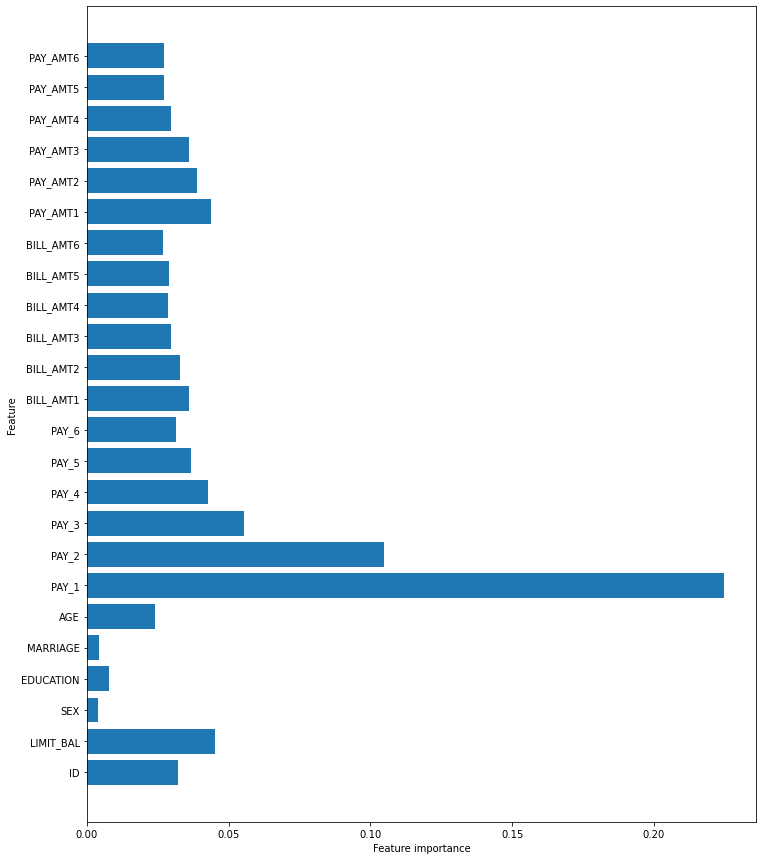

In [28]:
def plot_feature_importances(model, x_train_df):
    n_features = x_train_df.shape[1]
    plt.figure(figsize=(12,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train_df.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rf_clf_best, X_train_norm)

In [29]:
# First two payments (especially true for first payment) is the best predictor for default.. makes sense

In [31]:
rf_clf_best.score(X_train_norm, y_train)

0.8508888888888889

In [32]:
# Predictions on test set
test_preds = rf_clf_best.predict(X_test_norm)

print_metrics(y_test, test_preds)

Precision Score (Test): 67.79%
Recall Score (Test): 34.52%
Accuracy Score (Test): 81.56%
F1 Score (Test): 45.74%
mAP (Test) Score: 38.15%


In [34]:
target_predict = rf_clf_best.predict(X_train_norm)

In [35]:
print(classification_report(y_train, target_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     17553
           1       0.81      0.42      0.55      4947

    accuracy                           0.85     22500
   macro avg       0.83      0.70      0.73     22500
weighted avg       0.85      0.85      0.83     22500



In [36]:
cm = confusion_matrix(y_test, test_preds)
print(cm)

[[5534  277]
 [1106  583]]


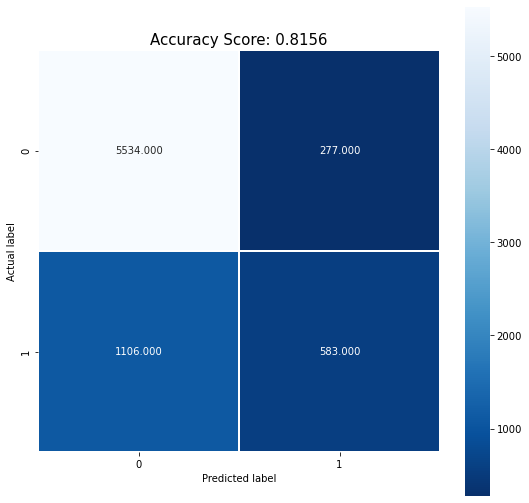

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, test_preds), 4))
plt.title(all_sample_title, size = 15);

Our model is hurt the most by false negatives as seen in both the bottom row of the confusion matrix and the poor recall score. 

It actually does well predicting those who will not default (0).

The issue could be mainly because of the class imbalance. Additionally, we did not do too much pre-processing to clean the data.

### AdaBoost

In [51]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [53]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Fit AdaBoostClassifier
adaboost_clf.fit(X_train_norm, y_train)

# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train_norm)
adaboost_test_preds = adaboost_clf.predict(X_test_norm)

In [58]:
print_metrics(adaboost_train_preds, y_train, adaboost_test_preds, y_test)

Training Model:
Precision Score (Train): 69.32%
Recall Score (Train): 32.79%
Accuracy Score (Train): 82.03%
F1 Score (Train): 44.52%
mAP (Train) Score: 37.5%

Test Model:
Precision Score (Test): 31.14%
Recall Score (Test): 69.3%
Accuracy Score (Test): 81.39%
F1 Score (Test): 42.97%
mAP (Test) Score: 24.69%


In [60]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X, y, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):
0.7979666666666667


### Gradient Boost

In [63]:
# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

# Fit GradientBoostingClassifier
gbt_clf.fit(X_train_norm, y_train)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train_norm)
gbt_clf_test_preds = gbt_clf.predict(X_test_norm)

In [64]:
print_metrics(gbt_clf_train_preds, y_train, gbt_clf_test_preds, y_test)

Training Model:
Precision Score (Train): 70.13%
Recall Score (Train): 38.31%
Accuracy Score (Train): 82.85%
F1 Score (Train): 49.55%
mAP (Train) Score: 40.43%

Test Model:
Precision Score (Test): 36.12%
Recall Score (Test): 67.85%
Accuracy Score (Test): 81.76%
F1 Score (Test): 47.14%
mAP (Test) Score: 28.36%


Gradient Boost looks like best out of box model so far... outperforms adaboost

### XGBoost

In [5]:
from xgboost import XGBClassifier

In [8]:
# Instantiate XGBClassifier
xgb_clf = XGBClassifier()

# Fit XGBClassifier
xgb_clf.fit(X_train_norm, y_train)

# Predict on training and test sets
training_preds = xgb_clf.predict(X_train_norm)
test_preds = xgb_clf.predict(X_test_norm)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

[16:40:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 88.76%
Validation accuracy: 81.33%


In [9]:
print_metrics(training_preds, y_train, test_preds, y_test)

Training Model:
Precision Score (Train): 88.98%
Recall Score (Train): 55.81%
Accuracy Score (Train): 88.76%
F1 Score (Train): 68.6%
mAP (Train) Score: 59.38%

Test Model:
Precision Score (Test): 36.89%
Recall Score (Test): 65.1%
Accuracy Score (Test): 81.33%
F1 Score (Test): 47.09%
mAP (Test) Score: 28.47%


Wow, easily did the best on training model... potentially at the cost of some overfitting. Still impressive, especially with the speed of computation

In [11]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
    'gamma': [None, 5, 10]
}

In [12]:
grid_clf = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=3, n_jobs=1)
grid_clf.fit(X_train_norm, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_norm)
test_preds = grid_clf.predict(X_test_norm)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

[16:46:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[16:46:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[16:47:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

Jesus... Note to self... get rid of warning labels beforehand.

In [13]:
print_metrics(training_preds, y_train, test_preds, y_test)

Training Model:
Precision Score (Train): 70.62%
Recall Score (Train): 38.0%
Accuracy Score (Train): 82.89%
F1 Score (Train): 49.42%
mAP (Train) Score: 40.47%

Test Model:
Precision Score (Test): 36.0%
Recall Score (Test): 67.71%
Accuracy Score (Test): 81.72%
F1 Score (Test): 47.0%
mAP (Test) Score: 28.24%


Was trying out gamma. Adding it at 10 brought up test scores by reducing overfitting.

Interesting that the test model does better on recall versus precision with the training model. I suppose that the model focused on those weak points causing the reversal in test set. I'm sure there is some tuning we could do to find a better medium there.

In [14]:
cm = confusion_matrix(y_test, test_preds)

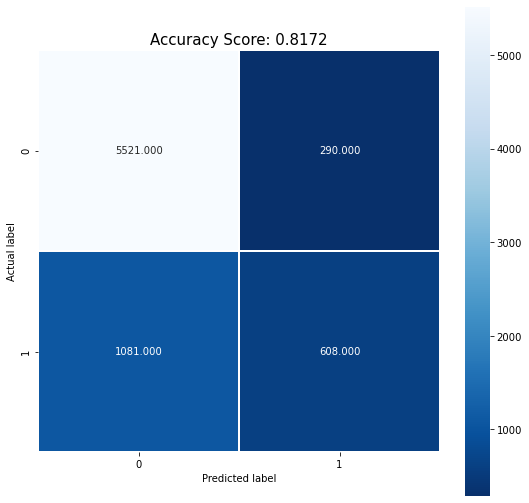

In [15]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, test_preds), 4))
plt.title(all_sample_title, size = 15);